In [ ]:
import shutil
from pathlib import Path
from ultralytics import YOLO
import cv2
def classify_images(input_dir='./images', output_dir='./classified_images', model_path='./models/CE_graph_classifier.pt', confidence_threshold=0.5):
    classes = ['bar', 'line_1', 'line_2', 'line_3']
    
    # Load model
    model = YOLO(/trained_model.pt)
    input_dir = Path(input_dir)
    output_dir = Path(output_dir)
    
    # Create output folders for each class plus 'others'
    for class_name in classes:
        (output_dir / class_name).mkdir(parents=True, exist_ok=True)
    (output_dir / 'others').mkdir(parents=True, exist_ok=True)
    
    # Get all image files
    image_files = list(input_dir.glob('*.jpg')) + \
                 list(input_dir.glob('*.png')) + \
                 list(input_dir.glob('*.jpeg'))
    
    if not image_files:
        print(f"No images found in {input_dir}")
        return
    
    print(f"Processing {len(image_files)} images...")
    
    # Classify and organize
    for img_path in image_files:
        results = model(img_path)
        
        for r in results:
            probs = r.probs
            predicted_class = classes[probs.top1]
            confidence = probs.top1conf
            
            # If confidence is below threshold, classify as 'others'
            if confidence < confidence_threshold:
                output_path = output_dir / 'others' / img_path.name
                shutil.copy2(img_path, output_path)
                print(f"{img_path.name} -> others (low confidence: {confidence:.3f})")
            else:
                # Copy image to appropriate folder
                output_path = output_dir / predicted_class / img_path.name
                shutil.copy2(img_path, output_path)
                print(f"{img_path.name} -> {predicted_class} ({confidence:.3f})")
    
    # Print summary
    print("\n" + "="*50)
    print("Classification complete! Summary:")
    for class_name in classes + ['others']:
        count = len(list((output_dir / class_name).glob('*')))
        print(f"  {class_name}: {count} images")
    print("="*50)

if __name__ == "__main__":
    classify_images(
        input_dir='./images',           # Folder containing images to classify
        output_dir='./classified_images', # Output folder (will create 5 subfolders)
        model_path='./models/CE_graph_classifier.pt',  # Trained model path
        confidence_threshold=0.5  # Images with confidence below this go to 'others'
    )

Found 21 image files to process...
[1/21] Processing: Lia_1_p3_fig1.jpeg - ✗ Skipped ([std, dab])
[2/21] Processing: Lia_1_p5_fig1.jpeg - ✗ Skipped (9)
[3/21] Processing: Lia_2_p2_fig1.png


image 1/1 D:\STUDY\CODE\Yolo_chem\Lia_1_p3_fig1.jpeg: 640x640 line_3 0.67, bar 0.23, line_2 0.09, line_1 0.01, 50.4ms
Speed: 66.9ms preprocess, 50.4ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


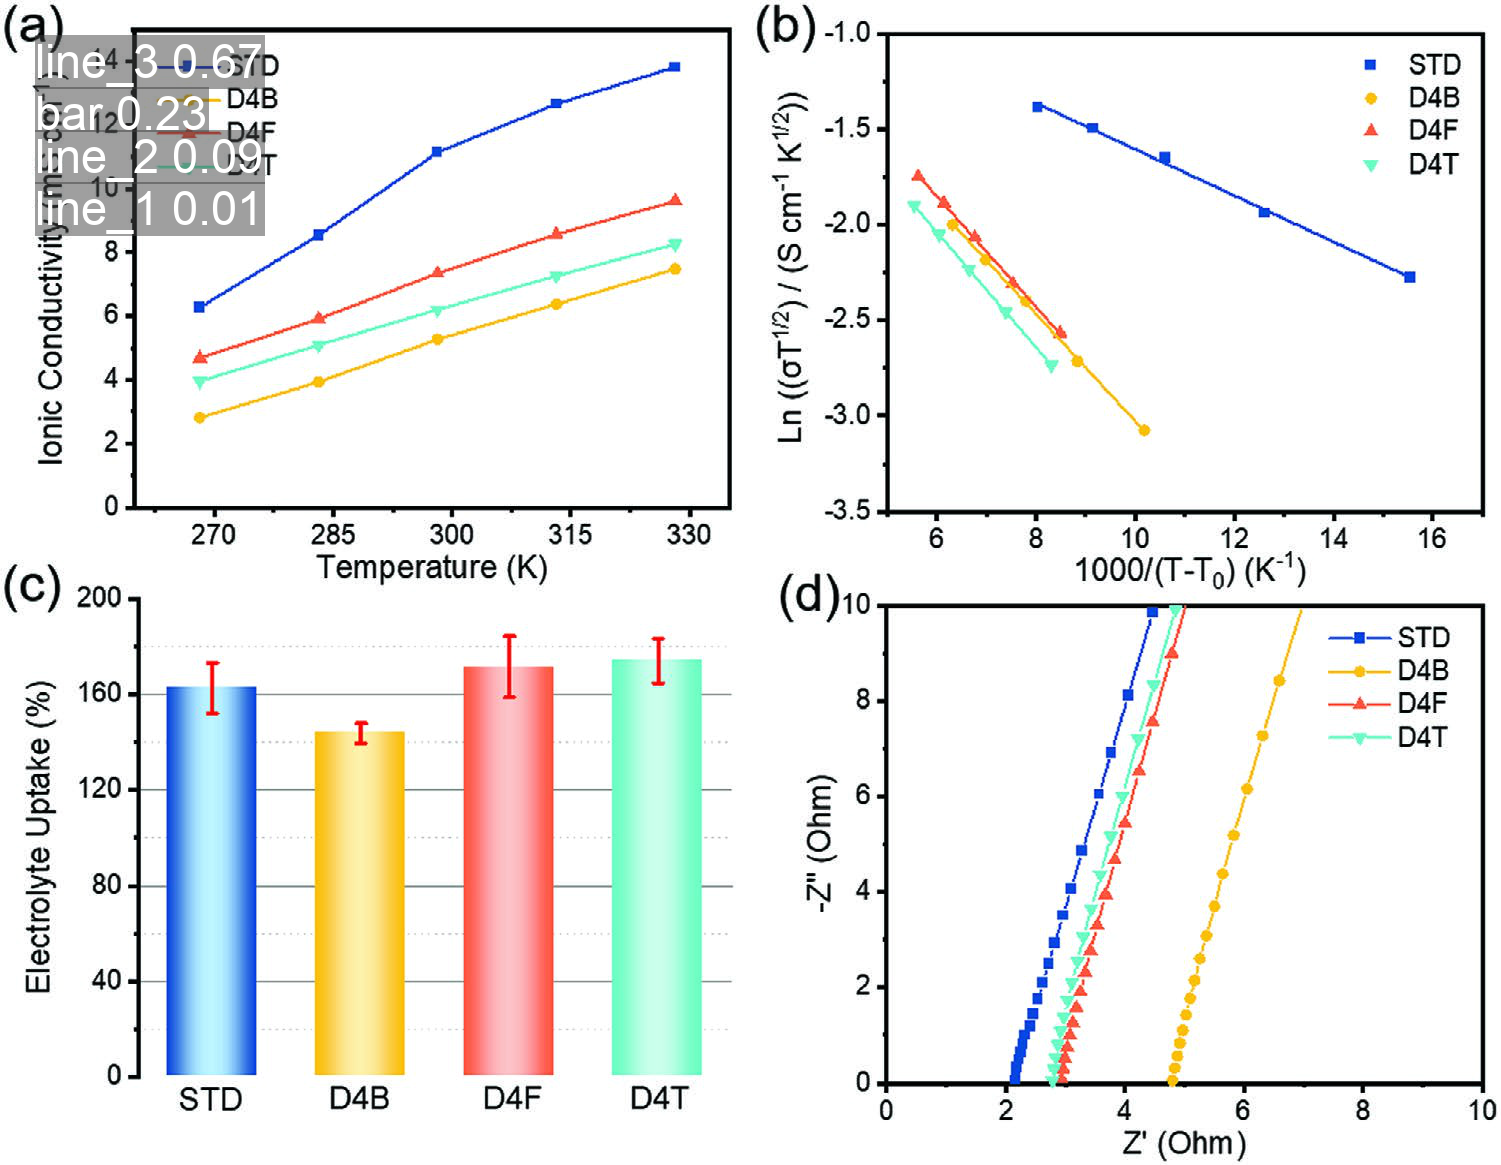

In [2]:
import shutil
from pathlib import Path
from ultralytics import YOLO
import cv2
from PIL import Image

model = YOLO("trained_model.pt") 

# Use the model to detect object
image = "D:/STUDY/CODE/Yolo_chem/Lia_1_p3_fig1.jpeg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))